## KuaiRec Dataset Analysis
### Introduction
This notebook explores the KuaiRec dataset, a large-scale dataset collected from the Kuaishou short-video platform. The dataset contains user interactions with videos, video metadata, and user information, making it suitable for building a short video recommender system.
### Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

In [2]:
DATA_PATH = "data_final_project/KuaiRec 2.0/data/"

# User-video interactions matrices
interactions_train = pd.read_csv(f"{DATA_PATH}big_matrix.csv")
interactions_test = pd.read_csv(f"{DATA_PATH}small_matrix.csv")

# Video metadata
kuairec_caption_category = pd.read_csv(
    f"{DATA_PATH}kuairec_caption_category.csv",
    engine="python",
    quotechar='"',
    on_bad_lines='skip'  # For pandas ≥ 1.3
)
item_categories = pd.read_csv(f"{DATA_PATH}item_categories.csv")
item_daily_features = pd.read_csv(f"{DATA_PATH}item_daily_features.csv")

# User data
social_network = pd.read_csv(f"{DATA_PATH}social_network.csv")
user_features = pd.read_csv(f"{DATA_PATH}user_features.csv")

## Data Overview
Let's get a comprehensive overview of each dataset file.
### Interaction Data
First, let's look at the training interaction data:

In [3]:
print("Training Interactions Shape:", interactions_train.shape)
print("\nColumns:", interactions_train.columns.tolist())
print("\nSample data:")
display(interactions_train.head())

Training Interactions Shape: (12530806, 8)

Columns: ['user_id', 'video_id', 'play_duration', 'video_duration', 'time', 'date', 'timestamp', 'watch_ratio']

Sample data:


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [4]:
print("Test Interactions Shape:", interactions_test.shape)
print("\nColumns:", interactions_test.columns.tolist())
print("\nSample data:")
display(interactions_test.head())

Test Interactions Shape: (4676570, 8)

Columns: ['user_id', 'video_id', 'play_duration', 'video_duration', 'time', 'date', 'timestamp', 'watch_ratio']

Sample data:


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


### Video Metadata

In [5]:
print("Caption & Category Data Shape:", kuairec_caption_category.shape)
print("\nColumns:", kuairec_caption_category.columns.tolist())
print("\nSample data:")
display(kuairec_caption_category.head())

print("\nDistribution of main categories:")
if 'first_level_category_name' in kuairec_caption_category.columns:
    print(kuairec_caption_category['first_level_category_name'].value_counts().head(10))

print("\n")
print(kuairec_caption_category.dtypes)
print("\nNumber of unique videos:", kuairec_caption_category['video_id'].nunique()) 

print("\nNumber of first level categories:", kuairec_caption_category['first_level_category_name'].nunique())
print("Number of second level categories:", kuairec_caption_category['second_level_category_name'].nunique())
print("Number of third level categories:", kuairec_caption_category['third_level_category_name'].nunique())

# Check if 'video_id' contains non-numeric values
if not pd.to_numeric(kuairec_caption_category['video_id'], errors='coerce').notnull().all():
    print("\nThere are non-numeric values in 'video_id'.")
    print(pd.to_numeric(kuairec_caption_category['video_id'], errors='coerce').isnull().sum(), "non-numeric values found.") # = 4
    # That's why there are 10728 unique videos in the item tables and 10732 in kuairec_caption_category
else:
    print("\nAll 'video_id' values are numeric.")

Caption & Category Data Shape: (10732, 10)

Columns: ['video_id', 'manual_cover_text', 'caption', 'topic_tag', 'first_level_category_id', 'first_level_category_name', 'second_level_category_id', 'second_level_category_name', 'third_level_category_id', 'third_level_category_name']

Sample data:


,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
1,1,UNKNOWN,NaN,[],27.0,高新数码,-124.0,UNKNOWN,-124.0,UNKNOWN
2,2,UNKNOWN,晚饭后，运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
3,3,UNKNOWN,我平淡无奇，惊艳不了时光，温柔不了岁月，我只想漫无目的的走走，努力发笔小财，给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装



Distribution of main categories:
first_level_category_name
民生资讯    1095
时尚      1034
其他       913
颜值       824
情感       532
美食       475
明星娱乐     471
舞蹈       422
生活       417
自拍       379
Name: count, dtype: int64


video_id                       object
manual_cover_text              object
caption                        object
topic_tag                      object
first_level_category_id       float64
first_level_category_name      object
second_level_category_id      float64
second_level_category_name     object
third_level_category_id       float64
third_level_category_name      object
dtype: object

Number of unique videos: 10730

Number of first level categories: 41
Number of second level categories: 139
Number of third level categories: 221

There are non-numeric values in 'video_id'.
4 non-numeric values found.


In [6]:
print("Item Categories Shape:", item_categories.shape)
print("\nColumns:", item_categories.columns.tolist())
print("\nSample data:")
display(item_categories.head())

Item Categories Shape: (10728, 2)

Columns: ['video_id', 'feat']

Sample data:


,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


In [7]:
print("Item Daily Features Shape:", item_daily_features.shape)
print("\nColumns:", item_daily_features.columns.tolist())
print("\nSample data:")
display(item_daily_features.head())

Item Daily Features Shape: (343341, 58)

Columns: ['video_id', 'date', 'author_id', 'video_type', 'upload_dt', 'upload_type', 'visible_status', 'video_duration', 'video_width', 'video_height', 'music_id', 'video_tag_id', 'video_tag_name', 'show_cnt', 'show_user_num', 'play_cnt', 'play_user_num', 'play_duration', 'complete_play_cnt', 'complete_play_user_num', 'valid_play_cnt', 'valid_play_user_num', 'long_time_play_cnt', 'long_time_play_user_num', 'short_time_play_cnt', 'short_time_play_user_num', 'play_progress', 'comment_stay_duration', 'like_cnt', 'like_user_num', 'click_like_cnt', 'double_click_cnt', 'cancel_like_cnt', 'cancel_like_user_num', 'comment_cnt', 'comment_user_num', 'direct_comment_cnt', 'reply_comment_cnt', 'delete_comment_cnt', 'delete_comment_user_num', 'comment_like_cnt', 'comment_like_user_num', 'follow_cnt', 'follow_user_num', 'cancel_follow_cnt', 'cancel_follow_user_num', 'share_cnt', 'share_user_num', 'download_cnt', 'download_user_num', 'report_cnt', 'report_user

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


### User Information

In [8]:
print("User Features Shape:", user_features.shape)
print("\nColumns:", user_features.columns.tolist())
print("\nSample data:")
display(user_features.head())

print("Distribution of user activity:")
if 'user_active_degree' in user_features.columns:
    print(user_features['user_active_degree'].value_counts())

print("\nNumber of user_id values:", user_features['user_id'].nunique())

User Features Shape: (7176, 31)

Columns: ['user_id', 'user_active_degree', 'is_lowactive_period', 'is_live_streamer', 'is_video_author', 'follow_user_num', 'follow_user_num_range', 'fans_user_num', 'fans_user_num_range', 'friend_user_num', 'friend_user_num_range', 'register_days', 'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat2', 'onehot_feat3', 'onehot_feat4', 'onehot_feat5', 'onehot_feat6', 'onehot_feat7', 'onehot_feat8', 'onehot_feat9', 'onehot_feat10', 'onehot_feat11', 'onehot_feat12', 'onehot_feat13', 'onehot_feat14', 'onehot_feat15', 'onehot_feat16', 'onehot_feat17']

Sample data:


,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


Distribution of user activity:
user_active_degree
full_active      6092
high_active       938
UNKNOWN           118
middle_active      28
Name: count, dtype: int64

Number of user_id values: 7176


In [9]:
print("Social Network Shape:", social_network.shape)
print("\nColumns:", social_network.columns.tolist())
print("\nSample data:")
social_network.head()

Social Network Shape: (472, 2)

Columns: ['user_id', 'friend_list']

Sample data:


,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]


## Data Analysis
Now let's perform a deeper analysis of the dataset.
### Dataset Statistics
Let's analyze the basic statistics of the dataset:

In [10]:
print("Number of unique users:", interactions_train['user_id'].nunique())
print("Number of unique videos:", interactions_train['video_id'].nunique())
print("Total number of interactions:", len(interactions_train))
print("User-item matrix density:", 
      round(len(interactions_train) / (interactions_train['user_id'].nunique() * interactions_train['video_id'].nunique()) * 100, 4), "%")

Number of unique users: 7176
Number of unique videos: 10728
Total number of interactions: 12530806
User-item matrix density: 16.2771 %


In [11]:
print("Number of unique users:", interactions_test['user_id'].nunique())
print("Number of unique videos:", interactions_test['video_id'].nunique())
print("Total number of interactions:", len(interactions_test))
print("User-item matrix density:", 
      round(len(interactions_test) / (interactions_test['user_id'].nunique() * interactions_test['video_id'].nunique()) * 100, 4), "%")

Number of unique users: 1411
Number of unique videos: 3327
Total number of interactions: 4676570
User-item matrix density: 99.6202 %


In [12]:
# Check for missing values
print("\nMissing values in training interactions:")
datasets = {
    "Training Interactions": interactions_train,
    "Test Interactions": interactions_test,
    "Caption & Category": kuairec_caption_category,
    "Item Categories": item_categories,
    "Item Daily Features": item_daily_features,
    "Social Network": social_network,
    "User Features": user_features
}

missing_values = pd.DataFrame({
    'Dataset': list(datasets.keys()),
    'Total Missing Values': [df.isnull().sum().sum() for df in datasets.values()],
    'Total Elements': [df.size for df in datasets.values()],
    'Missing Percentage': [round(df.isnull().sum().sum() / df.size * 100, 4) for df in datasets.values()]
})

missing_values


Missing values in training interactions:


,Dataset,Total Missing Values,Total Elements,Missing Percentage
0,Training Interactions,0,100246448,0.0000
1,Test Interactions,545976,37412560,1.4593
2,Caption & Category,1392,107320,1.2971
3,Item Categories,0,21456,0.0000
4,Item Daily Features,321764,19913778,1.6158
5,Social Network,0,944,0.0000
6,User Features,650,222456,0.2922


#### Interactions per User

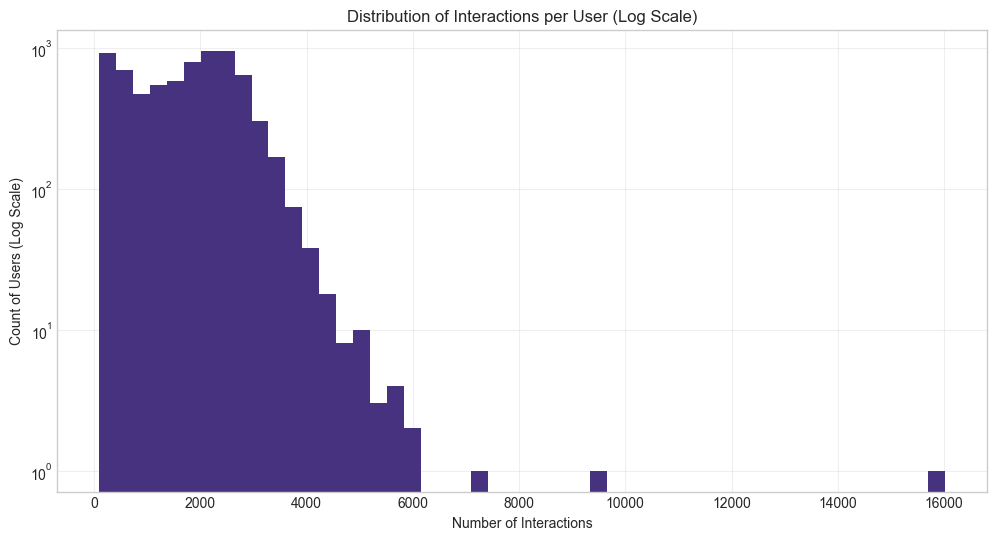

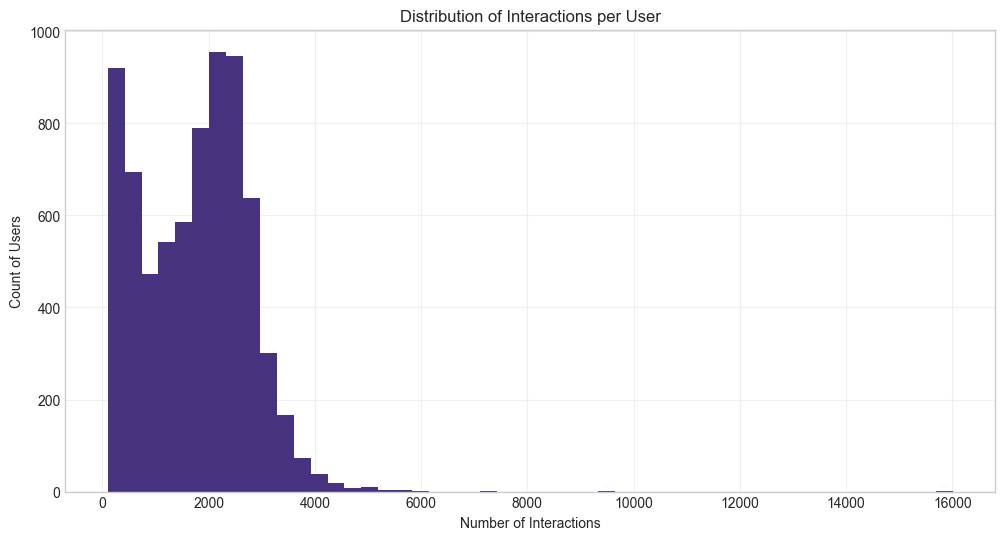

In [13]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = interactions_train["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

### Video Popularity and User Activity Analysis
Let's analyze video popularity and user activity:

In [14]:
# Top 10 most watched videos
video_popularity = interactions_train.groupby('video_id').size().sort_values(ascending=False)
top_videos = video_popularity.head(10).reset_index()
top_videos.columns = ['video_id', 'view_count']
top_videos

,video_id,view_count
0,8145,27615
1,1037,12419
2,9485,11134
3,10174,10416
4,7508,9986
5,10552,9737
6,4410,9509
7,8716,8693
8,1612,8322
9,3293,8179


In [15]:
# Top 10 most active users
user_activity = interactions_train.groupby('user_id').size().sort_values(ascending=False)
top_users = user_activity.head(10).reset_index()
top_users.columns = ['user_id', 'activity_count']
top_users

,user_id,activity_count
0,3133,16015
1,4247,9372
2,3586,7171
3,4117,6036
4,1092,6012
5,3287,5737
6,3655,5667
7,1657,5656
8,6792,5539
9,6468,5449


### Watch Behavior Analysis
Let's analyze the watching behavior of users:

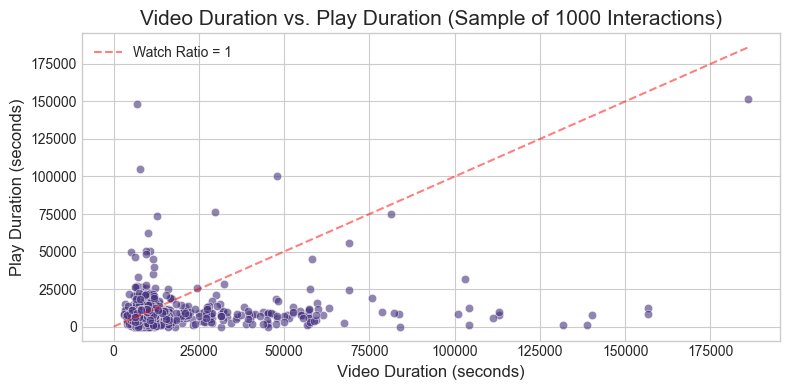

In [16]:
# Relationship between video duration and play duration
plt.figure(figsize=(8, 4))
sample = interactions_train.sample(1000, random_state=42)
sns.scatterplot(data=sample, x='video_duration', y='play_duration', alpha=0.6)
plt.title('Video Duration vs. Play Duration (Sample of 1000 Interactions)', fontsize=15)
plt.xlabel('Video Duration (seconds)', fontsize=12)
plt.ylabel('Play Duration (seconds)', fontsize=12)

max_val = max(sample['video_duration'].max(), sample['play_duration'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Watch Ratio = 1')
plt.legend()
plt.tight_layout()
plt.show()

### Video Categories Analysis
Let's analyze the distribution of video categories:

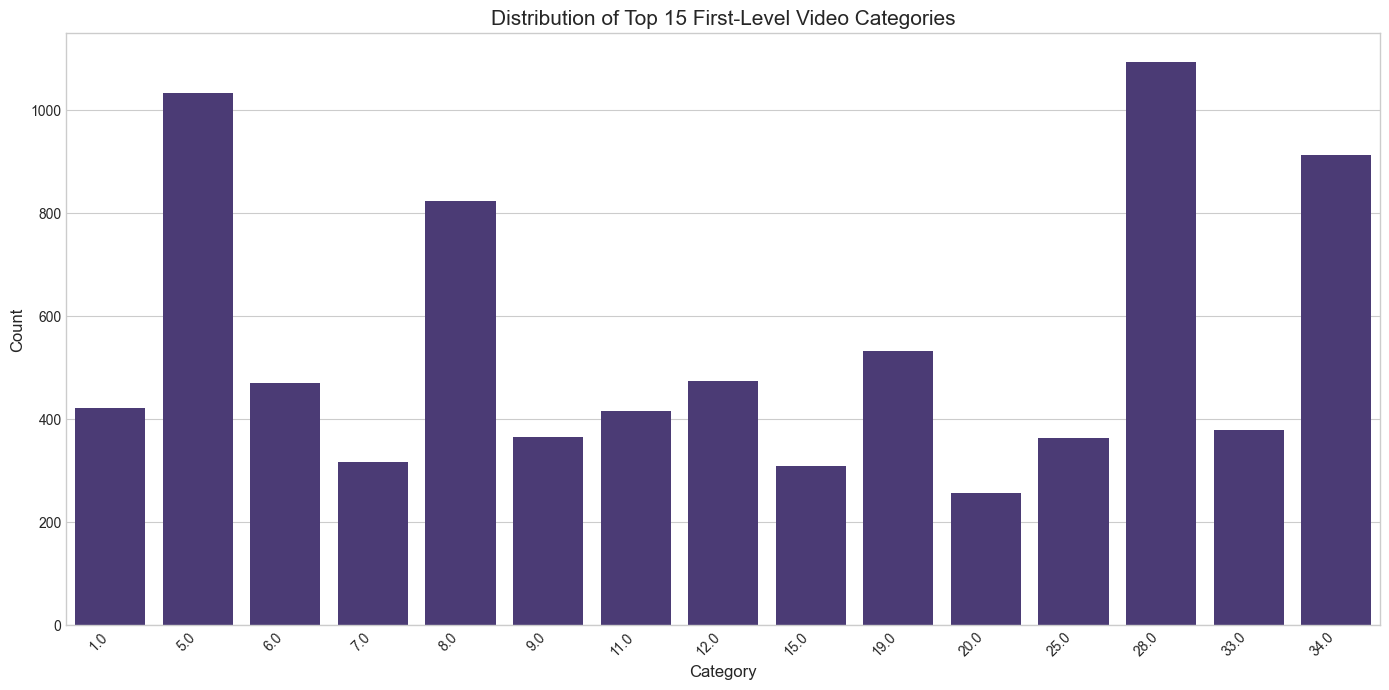

In [17]:
# Distribution of first-level categories
if 'first_level_category_id' in kuairec_caption_category.columns:
    category_counts = kuairec_caption_category['first_level_category_id'].value_counts().reset_index()
    category_counts.columns = ['category', 'count']
    
    plt.figure(figsize=(14, 7))
    sns.barplot(x='category', y='count', data=category_counts.head(15))
    plt.title('Distribution of Top 15 First-Level Video Categories', fontsize=15)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Engagement Metrics Analysis

In [18]:
# Analyze key engagement metrics
engagement_cols = ['play_cnt', 'like_cnt', 'comment_cnt', 'share_cnt']
engagement_metrics = item_daily_features[engagement_cols].describe()
engagement_metrics

,play_cnt,like_cnt,comment_cnt,share_cnt
count,3.433410e+05,3.433410e+05,343341.000000,343341.000000
mean,9.418781e+04,2.781109e+03,130.480764,80.380860
std,5.933298e+05,1.869603e+04,1565.610155,1284.173127
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.400000e+01,0.000000e+00,0.000000,0.000000
50%,6.280000e+02,9.000000e+00,0.000000,0.000000
75%,2.067100e+04,4.210000e+02,9.000000,3.000000
max,4.116795e+07,2.673037e+06,182959.000000,299286.000000


/Users/lucasduport/miniconda3/envs/rs/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/lucasduport/miniconda3/envs/rs/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/lucasduport/miniconda3/envs/rs/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/lucasduport/miniconda3/envs/rs/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


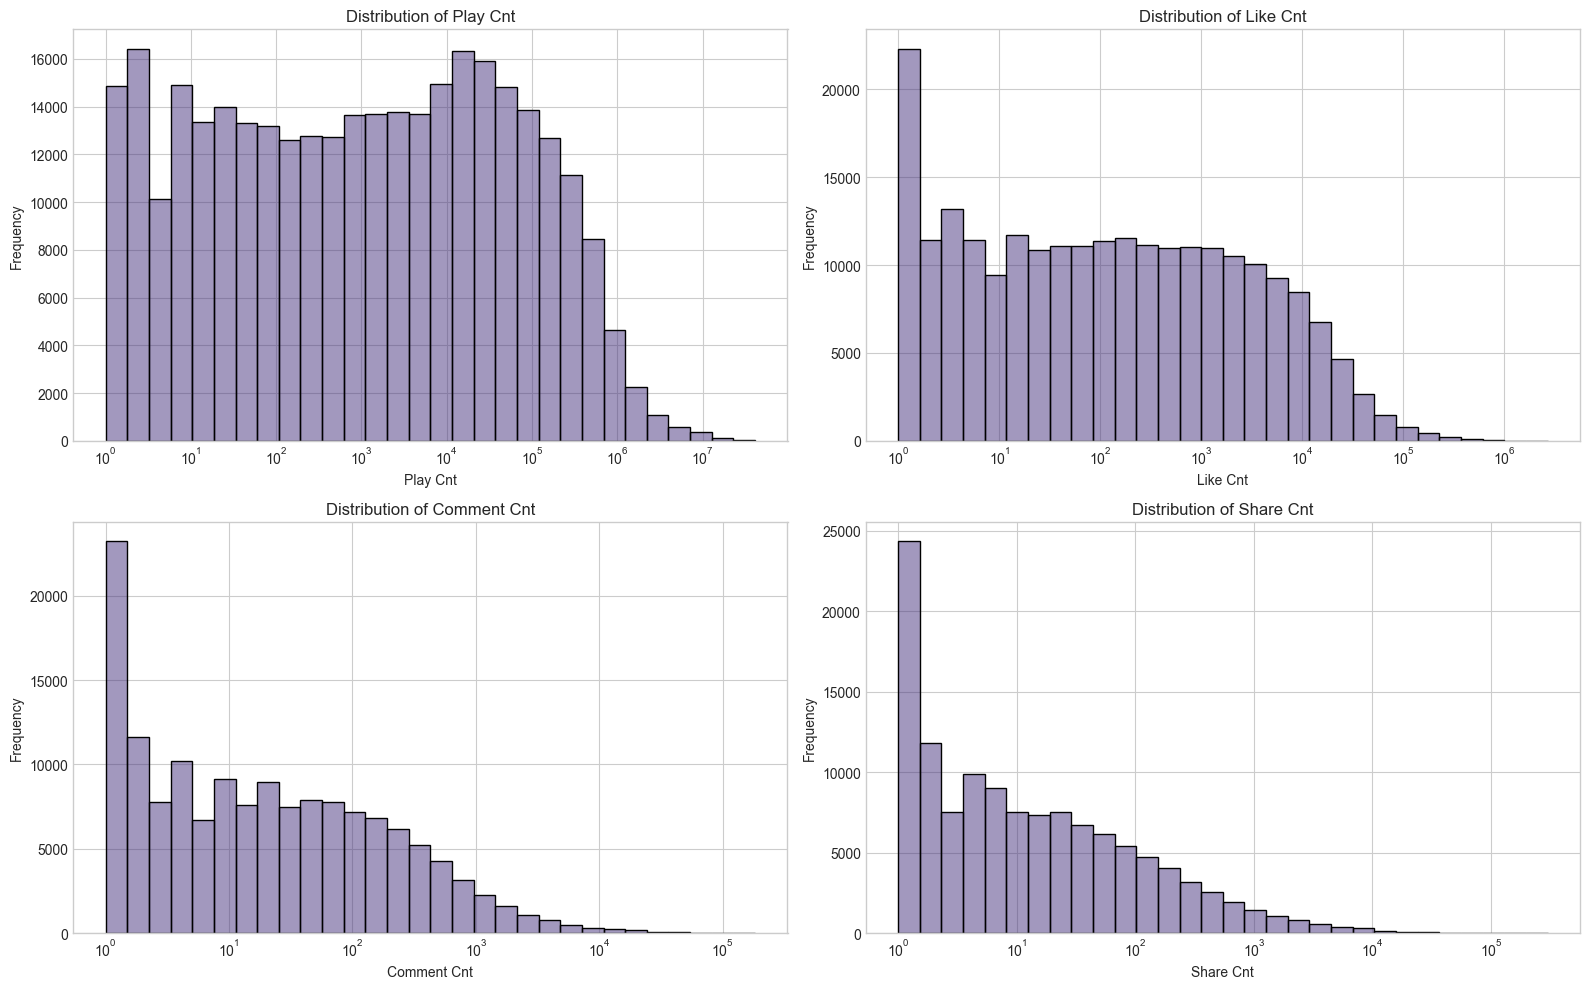

In [19]:
# Visualize engagement metrics distribution
plt.figure(figsize=(16, 10))
for i, col in enumerate(engagement_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(item_daily_features[col], bins=30, kde=True, log_scale=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=12)
    plt.xlabel(col.replace("_", " ").title(), fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

### Activity Patterns Analysis


User activity degree counts:
user_active_degree
full_active      6092
high_active       938
UNKNOWN           118
middle_active      28
Name: count, dtype: int64


/var/folders/2w/4qqf8r510cx2s9p_s4gc5z9c0000gn/T/ipykernel_62793/3989021150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='user_active_degree', data=user_features, order=user_features['user_active_degree'].value_counts().index, palette='pastel')


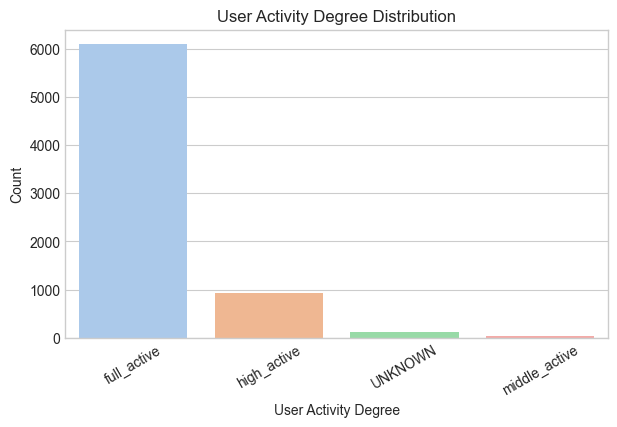

In [20]:

print("\nUser activity degree counts:")
print(user_features['user_active_degree'].value_counts())

plt.figure(figsize=(7,4))
sns.countplot(x='user_active_degree', data=user_features, order=user_features['user_active_degree'].value_counts().index, palette='pastel')
plt.title("User Activity Degree Distribution")
plt.xlabel("User Activity Degree")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

### Registration date

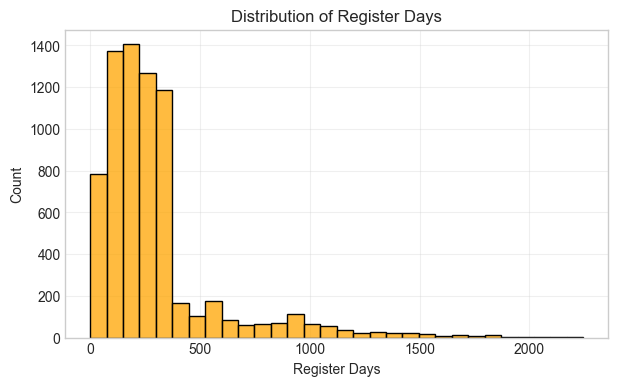

Register days - min: 0, max: 2245, mean: 296.79, median: 225.0


In [21]:

# 5. How long have users been registered?
plt.figure(figsize=(7,4))
sns.histplot(user_features['register_days'], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Register Days")
plt.xlabel("Register Days")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()
print(f"Register days - min: {user_features['register_days'].min()}, max: {user_features['register_days'].max()}, mean: {user_features['register_days'].mean():.2f}, median: {user_features['register_days'].median()}")
